## Basit Doğrusal Regresyon

In [2]:
import pandas as pd

In [7]:
ad = pd.read_csv("Advertising.csv" , usecols = [1,2,3,4])

In [8]:
df = ad.copy()

In [9]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [5]:
df = df.iloc[:,1:len(df)]

In [6]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe().T

count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0

In [12]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [13]:
df.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

In [3]:
import seaborn as sns

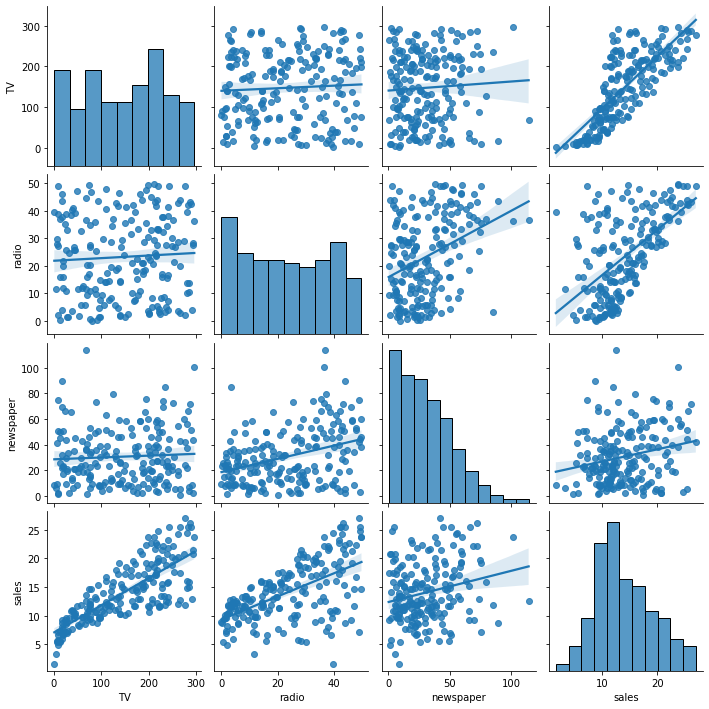

In [17]:
sns.pairplot(data = df, kind = "reg")

In [15]:
?sns.pairplot

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

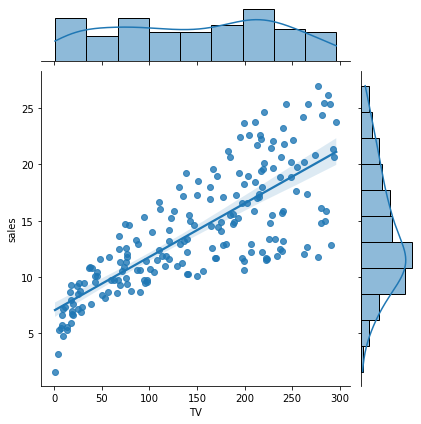

In [19]:
sns.jointplot(x = "TV",y = "sales", data = df , kind = "reg")

## Statsmodel ile modelleme

In [4]:
import statsmodels.api as sm

In [20]:
X = df[["TV"]]

In [21]:
X[0:5]

TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8

In [23]:
X = sm.add_constant(X)

#### y BAĞIMLI DEĞİŞKEN X BAĞIMSIZ DEĞİŞKENİ

In [27]:
y = df["sales"]

In [28]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [29]:
lm = sm.OLS(y,X)

In [30]:
model = lm.fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           1.47e-42
Time:                        12:56:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           1.47e-42
Time:                        13:03:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [34]:
model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [35]:
model.conf_int()

0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

In [37]:
model.f_pvalue

1.467389700194647e-42

In [39]:
print("f_pvalue ="," %.3f " % model.f_pvalue)

f_pvalue =  0.000 


In [40]:
print("fvalue ="," %.3f " % model.fvalue)

fvalue =  312.145 


In [43]:
print("tvalues ="," %.3f " % model.tvalues[:1])

tvalues =  15.360 


In [44]:
model.mse_model

3314.618166868649

In [45]:
model.rsquared

0.611875050850071

In [46]:
model.rsquared_adj

0.6099148238341623

In [47]:
model.fittedvalues[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [48]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [49]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


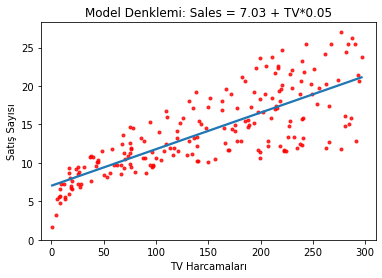

In [50]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [5]:
from sklearn.linear_model import LinearRegression

In [52]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_

array([0.04753664])

In [53]:
model.score(X,y)

0.611875050850071

In [54]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin

Model denklemi:

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [55]:
7.03 + 30*0.04

8.23

In [56]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [57]:
model.predict([[30]])

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [58]:
yeni_veri = [[5],[100],[200]]

In [60]:
model.predict(yeni_veri)

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.78625759, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [64]:
mse = mean_squared_error(y, model.fittedvalues)

In [65]:
mse

10.512652915656757

In [8]:
import numpy as np
rmse = np.sqrt(mse)

NameError: name 'mse' is not defined

In [69]:
rmse

3.2423221486546887

In [70]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [71]:
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [72]:
k_t = pd.DataFrame({"Gerçek Y Değeri " : y[:10],
                    "Tahmin Y Değeri ": reg.predict(X)[0:10]})

In [73]:
k_t

Gerçek Y Değeri   Tahmin Y Değeri 
0              22.1         17.970775
1              10.4          9.147974
2               9.3          7.850224
3              18.5         14.234395
4              12.9         15.627218
5               7.2          7.446162
6              11.8          9.765950
7              13.2         12.746498
8               4.8          7.441409
9              10.6         16.530414

In [74]:
k_t["hata"] = k_t["Gerçek Y Değeri "] - k_t["Tahmin Y Değeri "]

In [75]:
k_t

Gerçek Y Değeri   Tahmin Y Değeri       hata
0              22.1         17.970775  4.129225
1              10.4          9.147974  1.252026
2               9.3          7.850224  1.449776
3              18.5         14.234395  4.265605
4              12.9         15.627218 -2.727218
5               7.2          7.446162 -0.246162
6              11.8          9.765950  2.034050
7              13.2         12.746498  0.453502
8               4.8          7.441409 -2.641409
9              10.6         16.530414 -5.930414

In [76]:
k_t["hata_kare"] = k_t["hata"]**2

In [77]:
k_t

Gerçek Y Değeri   Tahmin Y Değeri       hata  hata_kare
0              22.1         17.970775  4.129225  17.050503
1              10.4          9.147974  1.252026   1.567569
2               9.3          7.850224  1.449776   2.101851
3              18.5         14.234395  4.265605  18.195390
4              12.9         15.627218 -2.727218   7.437719
5               7.2          7.446162 -0.246162   0.060596
6              11.8          9.765950  2.034050   4.137358
7              13.2         12.746498  0.453502   0.205664
8               4.8          7.441409 -2.641409   6.977040
9              10.6         16.530414 -5.930414  35.169814

In [79]:
np.sum(k_t["hata_kare"])

92.90350329638103

In [80]:
np.mean(k_t["hata_kare"])

9.290350329638105

In [81]:
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996776

In [83]:
model.resid[:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

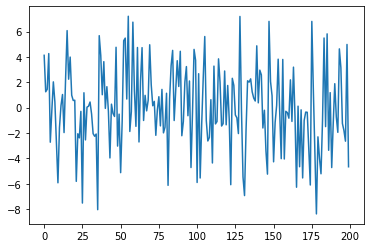

In [84]:
plt.plot(model.resid)

# Çoklu Doğrusal Regresyon¶

In [85]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [86]:
X = df.drop("sales",axis = 1)

In [88]:
X

TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

In [89]:
y = df["sales"]

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.20 , random_state = 42)

In [94]:
X_train.shape

(160, 3)

In [95]:
X_test.shape

(40, 3)

In [96]:
y_train.shape

(160,)

In [97]:
y_test.shape

(40,)

In [98]:
training = df.copy()

In [99]:
training.shape

(200, 4)

## Statsmodels

In [100]:
lm = sm.OLS(y_train,X_train)

In [101]:
model = lm.fit()

In [102]:
model

In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):                   1.28e-137
Time:                        14:39:18   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Scikit Learn

In [105]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [108]:
model.intercept_

2.979067338122629

In [109]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin

Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?


In [110]:
yeni_veri = [[30],[10],[40]]

In [111]:
yeni_veri = pd.DataFrame(yeni_veri).T

In [112]:
yeni_veri

0   1   2
0  30  10  40

In [113]:
model.predict(yeni_veri)

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.32334798])

In [114]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [115]:
rmse

1.644727765644337

In [116]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [117]:
rmse

1.7815996615334504

## Model Tuning Model Doğrulama

In [1]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
import numpy as np

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [13]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [14]:
rmse

1.6748559274650712

In [25]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701031

In [16]:
model.score(X_train,y_train)

0.8971614078663419

In [17]:
cross_val_score(model,X,y,cv = 10, scoring = "r2").mean()

0.8853562237979616

In [18]:
cross_val_score(model,X_train,y_train,cv = 10, scoring = "r2").mean()

0.8733783298422939

In [24]:
np.sqrt(-cross_val_score(model,
                X_train,
                y_train,
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.6649345607872934

In [26]:
np.sqrt(-cross_val_score(model,
                X_test,
                y_test,
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.7399924960346644

## Temel Bileşen Regresyonu 

In [8]:
import pandas as pd

In [9]:
ad = pd.read_csv("Hitters.csv")

In [10]:
df = ad.copy()

In [13]:
df = df.dropna()

In [14]:
df

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
1      315    81      7    24   38     39     14    3449    835      69   
2      479   130     18    66   72     76      3    1624    457      63   
3      496   141     20    65   78     37     11    5628   1575     225   
4      321    87     10    39   42     30      2     396    101      12   
5      594   169      4    74   51     35     11    4408   1133      19   
..     ...   ...    ...   ...  ...    ...    ...     ...    ...     ...   
317    497   127      7    65   48     37      5    2703    806      32   
318    492   136      5    76   50     94     12    5511   1511      39   
319    475   126      3    61   43     52      6    1700    433       7   
320    573   144      9    85   60     78      8    3198    857      97   
321    631   170      9    77   44     31     11    4908   1457      30   

     CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary  \
1      321   414     375      N        W      632       43      10   475.0   
2      224   266     263      A        W      880       82      14   480.0   
3      828   838     354      N        E      200       11       3   500.0   
4       48    46      33      N        E      805       40       4    91.5   
5      501   336     194      A        W      282      421      25   750.0   
..     ...   ...     ...    ...      ...      ...      ...     ...     ...   
317    379   311     138      N        E      325        9       3   700.0   
318    897   451     875      A        E      313      381      20   875.0   
319    217    93     146      A        W       37      113       7   385.0   
320    470   420     332      A        E     1314      131      12   960.0   
321    775   357     249      A        W      408        4       3  1000.0   

    NewLeague  
1           N  
2           A  
3           N  
4           N  
5           A  
..        ...  
317         N  
318         A  
319         A  
320         A  
321         A  

[263 rows x 20 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [16]:
df.describe().T

count         mean          std   min    25%     50%     75%      max
AtBat    263.0   403.642586   147.307209  19.0  282.5   413.0   526.0    687.0
Hits     263.0   107.828897    45.125326   1.0   71.5   103.0   141.5    238.0
HmRun    263.0    11.619772     8.757108   0.0    5.0     9.0    18.0     40.0
Runs     263.0    54.745247    25.539816   0.0   33.5    52.0    73.0    130.0
RBI      263.0    51.486692    25.882714   0.0   30.0    47.0    71.0    121.0
Walks    263.0    41.114068    21.718056   0.0   23.0    37.0    57.0    105.0
Years    263.0     7.311787     4.793616   1.0    4.0     6.0    10.0     24.0
CAtBat   263.0  2657.543726  2286.582929  19.0  842.5  1931.0  3890.5  14053.0
CHits    263.0   722.186312   648.199644   4.0  212.0   516.0  1054.0   4256.0
CHmRun   263.0    69.239544    82.197581   0.0   15.0    40.0    92.5    548.0
CRuns    263.0   361.220532   331.198571   2.0  105.5   250.0   497.5   2165.0
CRBI     263.0   330.418251   323.367668   3.0   95.0   230.0   424.5   1659.0
CWalks   263.0   260.266160   264.055868   1.0   71.0   174.0   328.5   1566.0
PutOuts  263.0   290.711027   279.934575   0.0  113.5   224.0   322.5   1377.0
Assists  263.0   118.760456   145.080577   0.0    8.0    45.0   192.0    492.0
Errors   263.0     8.593156     6.606574   0.0    3.0     7.0    13.0     32.0
Salary   263.0   535.925882   451.118681  67.5  190.0   425.0   750.0   2460.0

In [23]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

In [24]:
dms

League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1           0         1           0           1            0            1
2           1         0           0           1            1            0
3           0         1           1           0            0            1
4           0         1           1           0            0            1
5           1         0           0           1            1            0
..        ...       ...         ...         ...          ...          ...
317         0         1           1           0            0            1
318         1         0           1           0            1            0
319         1         0           0           1            1            0
320         1         0           1           0            1            0
321         1         0           0           1            1            0

[263 rows x 6 columns]

In [25]:
y = df["Salary"]

In [26]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [27]:
X_

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1    315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2    479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3    496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4    321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5    594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   
..     ...    ...    ...   ...   ...    ...    ...     ...     ...     ...   
317  497.0  127.0    7.0  65.0  48.0   37.0    5.0  2703.0   806.0    32.0   
318  492.0  136.0    5.0  76.0  50.0   94.0   12.0  5511.0  1511.0    39.0   
319  475.0  126.0    3.0  61.0  43.0   52.0    6.0  1700.0   433.0     7.0   
320  573.0  144.0    9.0  85.0  60.0   78.0    8.0  3198.0   857.0    97.0   
321  631.0  170.0    9.0  77.0  44.0   31.0   11.0  4908.0  1457.0    30.0   

     CRuns   CRBI  CWalks  PutOuts  Assists  Errors  
1    321.0  414.0   375.0    632.0     43.0    10.0  
2    224.0  266.0   263.0    880.0     82.0    14.0  
3    828.0  838.0   354.0    200.0     11.0     3.0  
4     48.0   46.0    33.0    805.0     40.0     4.0  
5    501.0  336.0   194.0    282.0    421.0    25.0  
..     ...    ...     ...      ...      ...     ...  
317  379.0  311.0   138.0    325.0      9.0     3.0  
318  897.0  451.0   875.0    313.0    381.0    20.0  
319  217.0   93.0   146.0     37.0    113.0     7.0  
320  470.0  420.0   332.0   1314.0    131.0    12.0  
321  775.0  357.0   249.0    408.0      4.0     3.0  

[263 rows x 16 columns]

In [28]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2  224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3  828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4   48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5  501.0  336.0   194.0    282.0    421.0    25.0         0           1   

   NewLeague_N  
1            1  
2            0  
3            1  
4            1  
5            0

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [14]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale

In [26]:
pca = PCA()

In [27]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [28]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [15]:
import numpy as np

In [29]:
np.cumsum(np.round(pca.explained_variance_ratio_ , decimals = 4))*100

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28, 98.01, 98.68, 99.18, 99.49, 99.74, 99.9 , 99.96, 99.98,
       99.99])

In [30]:
lm = LinearRegression()

In [31]:
pcr_model = lm.fit(X_reduced_train,y_train)

In [32]:
pcr_model.intercept_

543.4834416243655

In [33]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Tahmin

In [34]:
y_pred = pcr_model.predict(X_reduced_train)

In [35]:
y_pred

array([ 377.44484744,  802.19452124,  495.60987745,  112.53177731,
        426.21613066, 1004.23596416,  154.72971833,  362.56259753,
        485.37668246,  918.71501904, 1620.99526026,  818.02993072,
        920.95533578,  739.3382572 ,  645.87882395,  707.06456901,
       1140.22353689,   39.54286417,  214.23266234,  406.95301037,
        709.82017147, 1085.30861698,  474.11046697,  392.58559541,
         13.6999039 ,  757.39012886,  561.29851555,  186.48267003,
        339.1638919 ,  319.82071156,  204.79179178,  499.65294236,
        949.28770496,  299.72590518,  493.63961046,  425.33482329,
        421.42509882,  676.19046126,  291.98979874,  204.65385426,
        214.68142908,  322.00975193,  202.19998672,  133.72690504,
        226.30381247, 1089.93782038,  330.91104281,  530.17785961,
        343.40761997,  322.68069546,  540.66047538,  442.79601126,
        331.58333334,  450.81020519,  655.98795628,  282.13313722,
        452.62291839,  713.16274623,  270.42943769, 1530.14910

In [36]:
np.sqrt(mean_squared_error(y_train,y_pred))

289.32928255649756

In [37]:
r2_score(y_train,y_pred)

0.577007525041018

In [38]:
pca2 = PCA()


In [39]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [40]:
y_pred = pcr_model.predict(X_reduced_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.1575364149963

## Model Tuning

In [44]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


In [18]:
from sklearn import model_selection

In [49]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [50]:
lm = LinearRegression()

In [51]:
RMSE = []

In [52]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

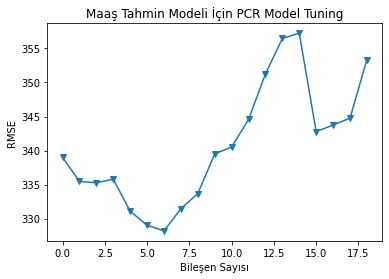

In [57]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [58]:
lm = LinearRegression()

In [60]:
pcr_model = lm.fit(X_reduced_train[:,:6],y_train)

In [61]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [62]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.8265983094501


In [63]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [64]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.11987000962233


# PLS

In [29]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [67]:
pls_model = PLSRegression().fit(X_train,y_train)

In [68]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [72]:
pls_model = PLSRegression(n_components = 2).fit(X_train,y_train)

In [73]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

## Tahmin

In [75]:
pls_model.predict(X_train)[:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [76]:
y_pred = pls_model.predict(X_train)

In [77]:
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [78]:
r2_score(y_train, y_pred)

0.5140424486535482

In [79]:
y_pred = pls_model.predict(X_test)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

## Model Tuning

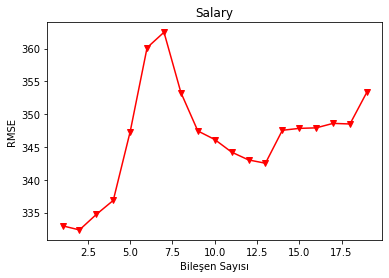

In [32]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [31]:
import matplotlib.pyplot as plt

In [33]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [34]:
y_pred = pls_model.predict(X_test)

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

## Ridge Regression

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
from sklearn.linear_model import Ridge

In [5]:
ridge_model = Ridge(alpha = 0.1).fit(X_train,y_train)

In [7]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [8]:
ridge_model.intercept_

-4.578626905721876

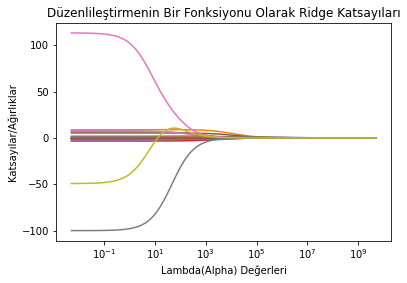

In [12]:
import numpy as np

lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

In [11]:
import matplotlib.pyplot as plt

## Tahmin

In [13]:
y_pred = ridge_model.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.0517922282842

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

## Model Tuning